In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy
from scipy.signal import firwin, freqz, lfilter
#import seaborn as sns
#sns.set_style("white")

## Plot filter response

List of known windows in scipy:

```
boxcar, triang, blackman, hamming, hann, bartlett, flattop,
    parzen, bohman, blackmanharris, nuttall, barthann,
    kaiser (needs beta), gaussian (needs std),
    general_gaussian (needs power, width),
    slepian (needs width), chebwin (needs attenuation)
    ```

In [3]:
def plot_pfb_fir(n_chan=32, n_tap=4, window="hamming", **kwargs):
    # Generate filter coefficients
    f_cutoff = 1.0 / n_chan
    lpf = firwin(n_chan * n_tap, cutoff=f_cutoff, window=window)
    
    # Compute frequency response
    w, h = freqz(lpf, a=1, worN=8192)
    h_dB = 20 * np.log10 (abs(h))
    
    #plot data
    label = '%i-tap, %s window' % (n_tap, window)
    plt.plot(w/max(w) * n_chan/2, h_dB, **kwargs)
    wmax = np.max(w/max(w) * n_chan/2)
    rev = h_dB[::-1]
    plt.plot(w/max(w) * n_chan/2-wmax, rev,  **kwargs)
    plt.ylim(-80, 5)
    plt.legend()
    plt.ylabel('Magnitude (dB)')
    plt.xlabel(r'Frequency (Normalized to bin width)')
    #plt.title(r'Frequency response')
    
def plot_fft_fir(n_chan=32, n_tap=4, window="hamming", **kwargs):
    # Generate filter coefficients
    f_cutoff = 1.0 / n_chan
    lpf = firwin(n_chan * n_tap, cutoff=f_cutoff, window=window)
    lpf = np.ones_like(lpf) / len(lpf)
    # Compute frequency response
    w, h = freqz(lpf, a=1, worN=8192)
    h_dB = 20 * np.log10 (abs(h))
    
    #plot data
    label = '%i-tap, %s window' % (n_tap, window)
    plt.plot(w/max(w) * n_chan/2, h_dB, **kwargs)
    wmax = np.max(w/max(w) * n_chan/2)
    rev = h_dB[::-1]
    plt.plot(w/max(w) * n_chan/2-wmax, rev,  **kwargs)
    plt.ylim(-80, 5)
    plt.legend()
    plt.ylabel('Magnitude (dB)')
    plt.xlabel(r'Frequency (Normalized to bin width)')
    #plt.title(r'Frequency response')

In [192]:
firwin?

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


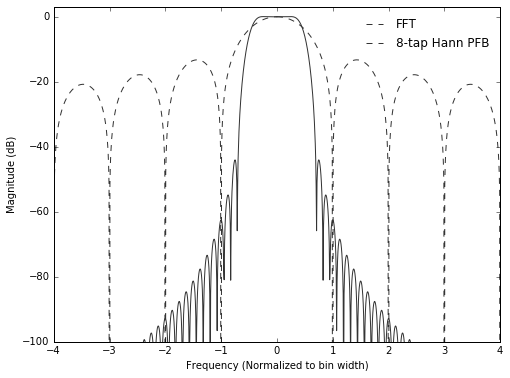

In [4]:
plt.figure(figsize=(8, 6))
plot_fft_fir(n_chan=128, n_tap=1, window="boxcar", ls='--', c='#333333')
#plot_pfb_fir(n_chan=128, n_tap=2, window="hann", ls='dashed')
#plot_pfb_fir(n_chan=128, n_tap=4, window="hann", ls='dotted')
plot_pfb_fir(n_chan=128, n_tap=8, window="hann", ls='-', c='#333333')
#plt.xlim(0, 2)
plt.xlim(-4, 4)
plt.ylim(-100, 3)
plt.legend(['FFT', '8-tap Hann PFB'], frameon=False)
plt.savefig("rectangular.pdf")
plt.show()

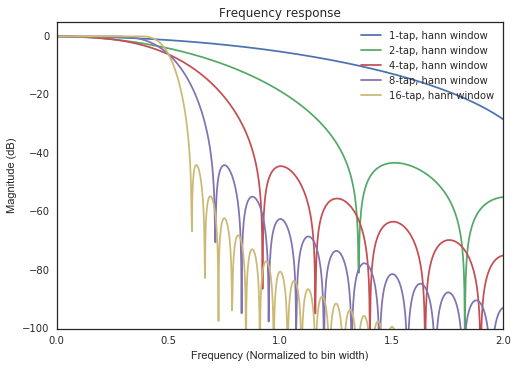

In [186]:
plot_pfb_fir(n_chan=32, n_tap=1,  window="hann")
plot_pfb_fir(n_chan=32, n_tap=2,  window="hann")
plot_pfb_fir(n_chan=32, n_tap=4,  window="hann")
plot_pfb_fir(n_chan=32, n_tap=8,  window="hann")
plot_pfb_fir(n_chan=32, n_tap=16, window="hann")
plt.xlim(0, 2)
plt.ylim(-100, 5)
plt.savefig("hann.pdf")
plt.show()

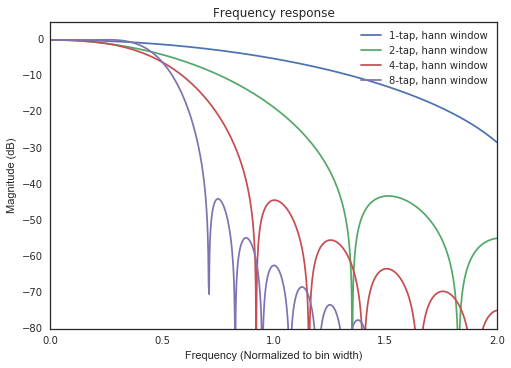

In [102]:
plot_pfb_fir(n_chan=32, n_tap=1, window="hann")
plot_pfb_fir(n_chan=32, n_tap=2, window="hann")
plot_pfb_fir(n_chan=32, n_tap=4, window="hann")
plot_pfb_fir(n_chan=32, n_tap=8, window="hann")
plt.xlim(0, 2)
#plt.ylim(-1, 1)
plt.show()

## Filter coefficients

In [5]:
def plot_impz(n_chan=8, n_tap=4, window="hamming"):
    """ Plot impulse response """
    f_cutoff = 1.0 / n_chan
    lpf = firwin(n_chan * n_tap, cutoff=f_cutoff, window=window)
    l = len(lpf)
    impulse = np.repeat(0.,l); impulse[0] =1.
    x = np.arange(0,l)
    response = lfilter(lpf,1,impulse)
    mm = ['o', 's', 'd', 'p', 'v', '^',  '<', '>']
    cc = ['#000000', '#222222', '#444444', '#666666', '#888888', '#AAAAAA', '#BBBBBB', '#CCCCCC']
    for ii in range(0, 8):
        markerline, stemlines, baseline = plt.stem(x[ii::8], response[ii::8], markerfmt=mm[ii])
        plt.setp(markerline, 'markerfacecolor', '#333333')
        plt.setp(stemlines, 'color', '#333333')
        plt.setp(baseline, 'color', '#000000', 'linewidth', 1)
    plt.ylabel('Amplitude')
    plt.xlabel(r'n (samples)')
    plt.title(r'Impulse response')

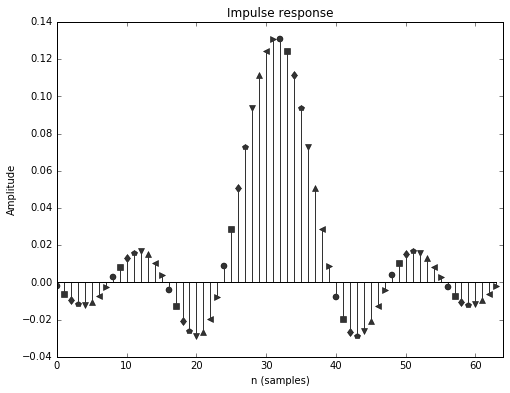

In [6]:
#plot_impz(n_chan=16, n_tap=8, window="rectangular")
plt.figure(figsize=(8, 6))
plot_impz(n_chan=8, n_tap=8, window="rectangular")
plt.xlim(0, 64)
plt.savefig("fir_filter_8taps.pdf")

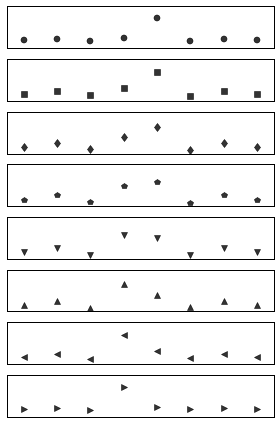

In [129]:
def plot_impz(n_chan=8, n_tap=4, window="hamming"):
    """ Plot impulse response """
    f_cutoff = 1.0 / n_chan
    lpf = firwin(n_chan * n_tap, cutoff=f_cutoff, window=window)
    l = len(lpf)
    impulse = np.repeat(0.,l); impulse[0] =1.
    x = np.arange(0,l)
    response = lfilter(lpf,1,impulse)
    mm = ['o', 's', 'd', 'p', 'v', '^',  '<', '>']
    cc = ['#000000', '#222222', '#444444', '#666666', '#888888', '#AAAAAA', '#BBBBBB', '#CCCCCC']
    for ii in range(0, 8):
        plt.subplot(8, 1, ii+1)
        markerline, stemlines, baseline = plt.stem(x[:8], response[ii::8], markerfmt=mm[ii])
        plt.setp(markerline, 'markerfacecolor', '#333333')
        plt.setp(stemlines, 'color',  '#333333', 'linewidth', 0)
        plt.setp(baseline, 'color', '#000000', 'linewidth', 0)
        plt.xticks([],[""])
        plt.yticks([], [""])
        #plt.title("Branch %i" % (ii+1))
        plt.ylim(-0.05, 0.2)
        plt.xlim(-0.5, 7.5)
plt.figure(figsize=(4, 6))
plot_impz(n_chan=8, n_tap=8, window="rectangular")
plt.tight_layout()
plt.savefig("fir_filter_decomposition.pdf")


### Polyphase filter example

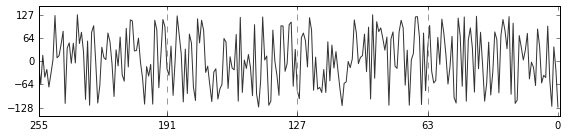

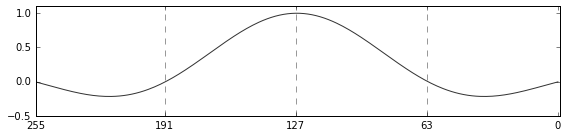

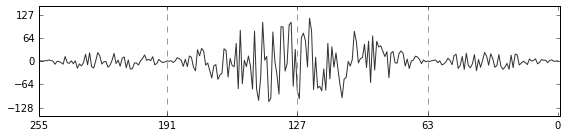

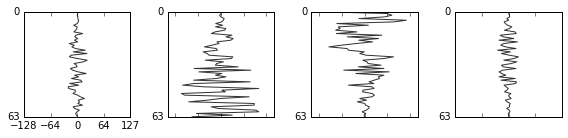

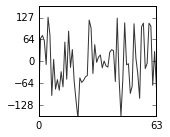

In [35]:
n_chan = 64
n_taps = 4
window = "boxcar"

# Generate noise and window
noise = np.round((np.random.random(n_chan * n_taps) - 0.5) * 256)
#noise = np.sin(np.arange(0, n_chan*n_taps))
window = scipy.signal.get_window(window, n_chan * n_taps)
sinc   = firwin(n_chan * n_taps, cutoff=1.0/n_chan, window="rectangular")
noise_weighted = noise * window * sinc / np.max(window * sinc)

# And plot
plt.figure(figsize=(8, 2))
#plt.subplot(3,1,1)
plt.plot(noise, c='#333333')
plt.xticks([0, 63, 127, 191, 255], [0, 63, 127, 191, 255][::-1])
plt.yticks([-128, -64, 0, 64, 127])
plt.xlim(0, n_chan * n_taps)
plt.axvline(x=63, ls='--', c='#999999')
plt.axvline(x=127, ls='--', c='#999999')
plt.axvline(x=191, ls='--', c='#999999')
plt.tight_layout()
plt.savefig("pfb_01.pdf")

plt.figure(figsize=(8, 2))
plt.plot((window * sinc) / np.max(window * sinc), c='#333333')
plt.xticks([0, 63, 127, 191, 255], [0, 63, 127, 191, 255][::-1])
plt.xlim(0, n_chan * n_taps)
plt.ylim(-0.5, 1.1)
plt.yticks([-0.5, 0, 0.5, 1])
plt.axvline(x=63, ls='--', c='#999999')
plt.axvline(x=127, ls='--', c='#999999')
plt.axvline(x=191, ls='--', c='#999999')
plt.tight_layout()
plt.savefig("pfb_02.pdf")

plt.figure(figsize=(8, 2))
plt.plot(noise_weighted, c='#333333')
plt.xticks([0, 63, 127, 191, 255], [0, 63, 127, 191, 255][::-1])
plt.yticks([-128, -64, 0, 64, 127])
plt.xlim(0, n_chan * n_taps)
plt.axvline(x=63, ls='--', c='#999999')
plt.axvline(x=127, ls='--', c='#999999')
plt.axvline(x=191, ls='--', c='#999999')
plt.tight_layout()
plt.savefig("pfb_03.pdf")


plt.figure(figsize=(8, 2))
tap_data = []
for ii in range(0, n_taps):
    plt.subplot(1, 4, ii+1)
    y = noise_weighted[ii*n_chan:(ii+1)*n_chan]
    x = np.arange(0, len(y))
    plt.plot(y, x[::-1],  c='#333333')
    plt.ylim(np.min(noise_weighted), np.max(noise_weighted))

    tap_data.append(noise_weighted[ii*n_chan:(ii+1)*n_chan])
    #plt.xticks([], [])
    if ii == 0:
        plt.xticks([-128, -64, 0, 64, 127])
    else: 
        plt.xticks([-128, -64, 0, 64, 127], ["", "", "", "", ""])
    plt.yticks([0, 63], [63, 0])
    plt.ylim(0, 63)
plt.tight_layout()
plt.savefig("pfb_04.pdf")

plt.figure(figsize=(8, 2))
plt.subplot(1, 4, 1)
plt.plot(np.sum(tap_data, axis=0), c='#333333')
plt.xticks([0, 63])
plt.xlim(0, 63)
plt.ylim(-64, 64)
plt.yticks([-128, -64, 0, 64, 127])
plt.ylim(-160, 160)
plt.tight_layout()
plt.savefig("pfb_05.pdf")

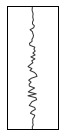

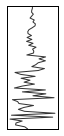

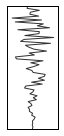

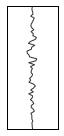

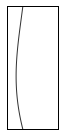

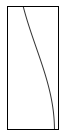

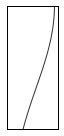

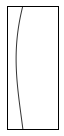

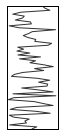

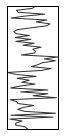

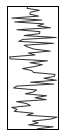

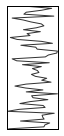

In [34]:

tap_data = []
for ii in range(0, n_taps):
    plt.figure(figsize=(1, 2))
    y = noise_weighted[ii*n_chan:(ii+1)*n_chan]
    x = np.arange(0, len(y))
    plt.plot(y, x[::-1],  c='#333333')
    plt.ylim(np.min(noise_weighted), np.max(noise_weighted))

    tap_data.append(noise_weighted[ii*n_chan:(ii+1)*n_chan])

    plt.xticks([])
    plt.yticks([])
    #plt.xlim(0, 63)
    plt.ylim(0,63)
    plt.xlim(-127, 127)
    plt.tight_layout()
    plt.savefig("pfb_dw_%i.pdf" % ii)

    
win = (window * sinc) / np.max(window * sinc)    
tap_data = []
for ii in range(0, n_taps):
    plt.figure(figsize=(1, 2))
    y = win[ii*n_chan:(ii+1)*n_chan]
    x = np.arange(0, len(y))
    plt.plot(y, x[::-1],  c='#333333')
    plt.ylim(np.min(noise_weighted), np.max(noise_weighted))

    tap_data.append(noise_weighted[ii*n_chan:(ii+1)*n_chan])

    plt.xticks([])
    plt.yticks([])
    #plt.xlim(0, 63)
    plt.ylim(0,63)
    plt.xlim(-0.5, 1.1)
    plt.tight_layout()
    plt.savefig("pfb_w_%i.pdf" % ii)

    
for ii in range(0, n_taps):
    plt.figure(figsize=(1, 2))
    y = noise[ii*n_chan:(ii+1)*n_chan]
    x = np.arange(0, len(y))
    plt.plot(y, x[::-1],  c='#333333')
    plt.ylim(np.min(noise_weighted), np.max(noise_weighted))

    tap_data.append(noise_weighted[ii*n_chan:(ii+1)*n_chan])

    plt.xticks([])
    plt.yticks([])
    #plt.xlim(0, 63)
    plt.ylim(0,63)
    plt.xlim(-127, 127)
    plt.tight_layout()
    plt.savefig("pfb_d_%i.pdf" % ii)    

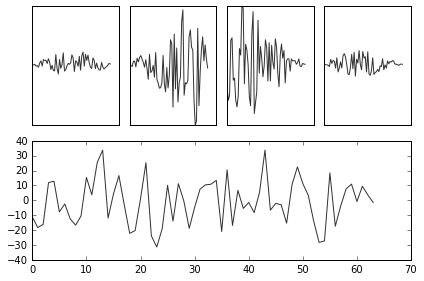

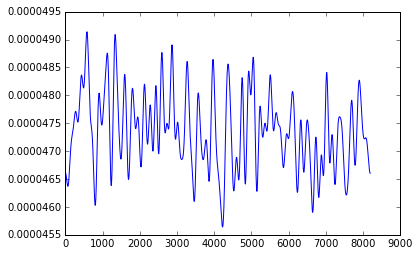

In [179]:
n_chan = 128
n_taps = 4
window = "boxcar"
window = scipy.signal.get_window(window, n_chan * n_taps)

n_int = 4096
os_fac = 128
spec_arr = np.zeros((n_int, (n_chan /2) * os_fac + 1))
sinc   = firwin(n_chan * n_taps, cutoff=1.0/n_chan, window="rectangular")
for ii in range(n_int):
    # Generate noise and window
    noise = np.random.random(n_chan * n_taps) - 0.5
    #noise = np.sin(np.arange(0, n_chan*n_taps))
    noise_weighted = noise * window * sinc
    
    noise_summed = noise_weighted.reshape(n_taps, n_chan).mean(axis=0)
    spec = np.abs(np.fft.rfft(noise_summed, len(noise_summed) * os_fac))**2
    spec_arr[ii] = spec
    
spec_avg = spec_arr.mean(axis=0)

plt.plot(spec_avg)

    

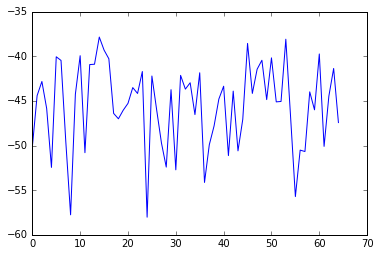

In [180]:
plt.plot(20*np.log10(np.fft.rfft(np.average(tap_data, axis=0))))

(-120, 5)

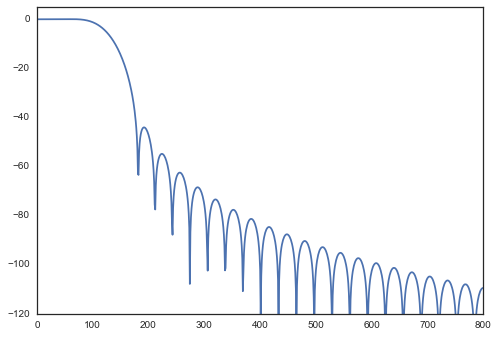

In [136]:
def db(x): return 10*np.log10(x)

def pfb(data, n_chan, n_tap, window="hamming"):
    
    # Generate filter coefficients
    win_len = n_chan * n_tap
    win_coeffs = scipy.signal.get_window(window, win_len)
    sinc   = firwin(n_chan * n_tap, cutoff=2.0/n_chan, window="rectangular")
    win_coeffs *= sinc
    win_coeffs = win_coeffs.reshape((n_tap, n_chan))
    
    # reshape data for application of filter
    data = data.reshape((data.shape[0] / n_chan, n_chan))
    
    pfb_out = np.zeros((len(data) - n_tap + 1, n_chan / 2 + 1), 
                       dtype='complex128')
    #print pfb_out.shape
    #print data.shape
    
    for ii in range(len(pfb_out)):
        d = data[ii:ii+n_tap]
        d = d * win_coeffs
        #d = d * sinc.reshape((n_tap, n_chan))
        d = np.average(d, axis=0)
        d = np.fft.rfft(d)
        pfb_out[ii] = d
    
    return pfb_out
    
    
n_chan = 256
n_tap = 4
window = "hann"
len_data = n_chan * n_taps * 16

peak_vals = []
for ii in np.arange(0, 400, 0.5):
    data = np.sin(np.linspace(0, 2*np.pi, len_data) * (512+ii))
    d = pfb(data, n_chan, n_tap, window=window)
    d = np.average(np.abs(d**2), axis=0)
    d_max = d[8]
    #print np.argmax(d)
    peak_vals.append(d_max)

plt.plot(db(peak_vals/np.max(peak_vals)))
#for ii in range(len(d)):
#    plt.plot(10*np.log10(np.abs(d[ii])))

plt.ylim(-120, 5)

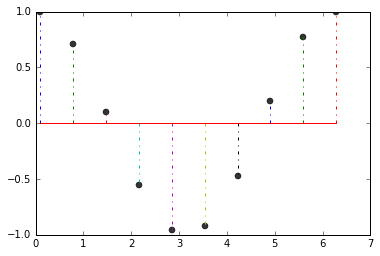

In [65]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.1, 2*np.pi, 10)
markerline, stemlines, baseline = plt.stem(x, np.cos(x), '-.')
plt.setp(markerline, 'markerfacecolor', '#333333')
#plt.setp(baseline, 'color', 'r', 'linewidth', 2)

plt.show()

In [127]:
pwd

u'/workdata/pfb_check'

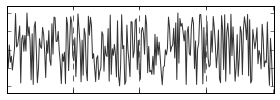

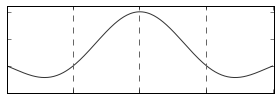

In [51]:
# And plot
plt.figure(figsize=(4, 1.5))
#plt.subplot(3,1,1)
plt.plot(noise, c='#333333')
plt.xticks([0, 63, 127, 191, 255], ["", "", "", "", ""])
plt.yticks([-128, -64, 0, 64, 127], ["", "", "", "", ""])
plt.xlim(0, n_chan * n_taps)
plt.axvline(x=63, ls='--', c='#666666')
plt.axvline(x=127, ls='--', c='#666666')
plt.axvline(x=191, ls='--', c='#666666')
plt.tight_layout()
plt.savefig("pfb_01.pdf")

plt.figure(figsize=(4, 1.5))
plt.plot((window * sinc) / np.max(window * sinc), c='#333333')
plt.xticks([0, 63, 127, 191, 255], ["", "", "", "", ""])
plt.xlim(0, n_chan * n_taps)
plt.ylim(-0.5, 1.1)
plt.yticks([-0.5, 0, 0.5, 1], ["", "", "", ""])
plt.axvline(x=63, ls='--', c='#666666')
plt.axvline(x=127, ls='--', c='#666666')
plt.axvline(x=191, ls='--', c='#666666')
plt.tight_layout()
plt.savefig("pfb_02.pdf")


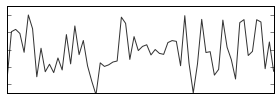

In [46]:
plt.figure(figsize=(4, 1.5))
plt.plot(np.sum(tap_data, axis=0), c='#333333')
plt.xticks([0, 63], ["", ""])
plt.xlim(0, 63)
plt.ylim(-64, 64)
plt.yticks([-128, -64, 0, 64, 127], ["", "", "", "", ""])
plt.ylim(-160, 160)
plt.tight_layout()
plt.savefig("pfb_05.pdf")